In [1]:
import astor, ast, json, astpretty, random
from tqdm import tqdm

In [2]:
def valid_code(code):
    try:
        ast.parse(code)
        return True
    except SyntaxError:
        return False

def get_lines_raw(code):
    lines = set()
    for line in code.split('\n'):
        line = line.strip()
        if valid_code(line) and len(line) <= 512 and line[:1] not in ['"', "'", '#'] and len(line) > 0:
            lines.add(line)
    return list(lines)

def parse_file(path):
    with open(path) as f:
        lines = f.readlines()

    lines_of_code = []
    for line in tqdm(lines):
        d = json.loads(line)
        lines_of_code += get_lines_raw(d['code'])

    return list(set(lines_of_code))

## Make Dataset

In [3]:
paths = [
    'python/test/python_test_0.jsonl',
    'python/valid/python_valid_0.jsonl',
    'python/train/python_train_0.jsonl',
    'python/train/python_train_1.jsonl',
    'python/train/python_train_2.jsonl',
    'python/train/python_train_3.jsonl',
    'python/train/python_train_4.jsonl',
    'python/train/python_train_5.jsonl',
    'python/train/python_train_6.jsonl',
    'python/train/python_train_7.jsonl',
    'python/train/python_train_8.jsonl',
    'python/train/python_train_9.jsonl',
    'python/train/python_train_10.jsonl',
    'python/train/python_train_11.jsonl',
    'python/train/python_train_12.jsonl',
    'python/train/python_train_13.jsonl',
]

In [4]:
all_lines = []

for path in tqdm(paths):
    all_lines += parse_file(path)

all_lines = list(set(all_lines))

random.shuffle(all_lines)

output_lines = []
for line in all_lines:
    output_lines.append(json.dumps({'text':line}))

with open('python_lines.jsonl', 'w') as f:
    f.write('\n'.join(output_lines))

100%|██████████| 16/16 [01:35<00:00,  5.96s/it]


## Data Overview

In [6]:
len(output_lines)

2645768

In [7]:
lenghts = []
for line in output_lines:
    lenghts.append(len(line))

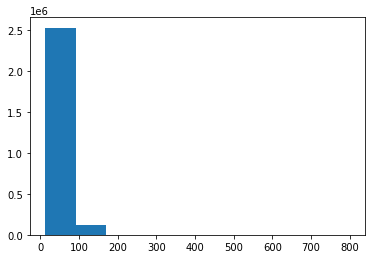

In [9]:
import matplotlib.pyplot as plt

plt.hist(lenghts)
plt.show()